# Intra-Cluster Light (ICL) profiles analysis in the Dark Energy Survey (DES)




In [1]:
import healpy as hp
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from healpy.rotator import Rotator
import kmeans_radec
from kmeans_radec import KMeans, kmeans_sample
import os
import os.path
import configparser
import sys
from astropy.table import Table

/home/hillysson/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
ini_file= 'redmapper_y1.ini'
config = configparser.ConfigParser()
inifile = config.read(ini_file)
input_dir_rdmp=config.get('input', 'input_dir')
catalog=config.get('input', 'catalog_file')
flag_files_rdmp=[ii.strip() for ii in config.get('input', 'flag_files').split(',')]
save_dir_rdmp=config.get('output', 'save_dir')
grid_output_dir_rdmp=config.get('grid_output', 'save_dir')
rdmp=pyfits.open(catalog)[1].data
flags_rdmp=np.zeros(len(rdmp))+1
indices_rdmp=np.arange(len(rdmp))

### ICL jacknife profiles subtraction

In [3]:
str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             '$\lambda$ = [60;150)']
richness_dir = ['richness_20_30/',
                'richness_30_45/',
                'richness_45_60/',
                'richness_60_beyond/']

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


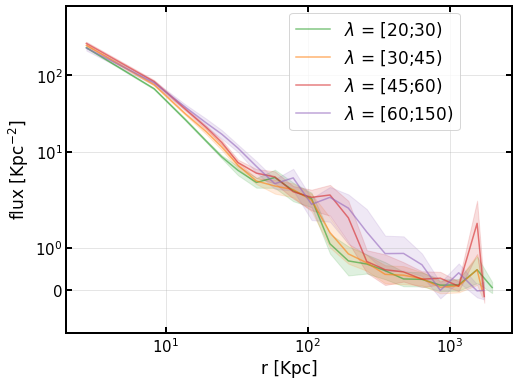

In [4]:
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
plt.yscale('symlog')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_unmasked.txt')
    r_red, mea_, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea_
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')

plt.ylabel('flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(-1, 800)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.5, 0.98), loc=2, fontsize=17,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


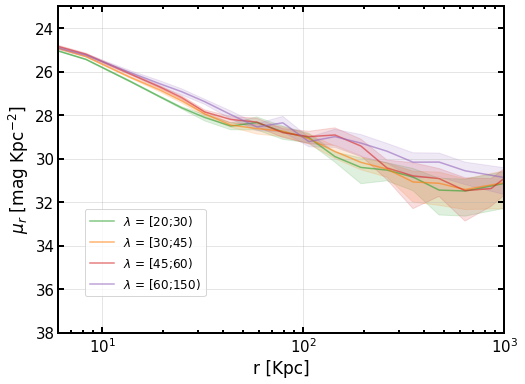

In [37]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    
    
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    

    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color=colors[i], alpha=0.15, label='')

plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(38,23)
plt.xlim(2,1000)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.06, 0.38), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


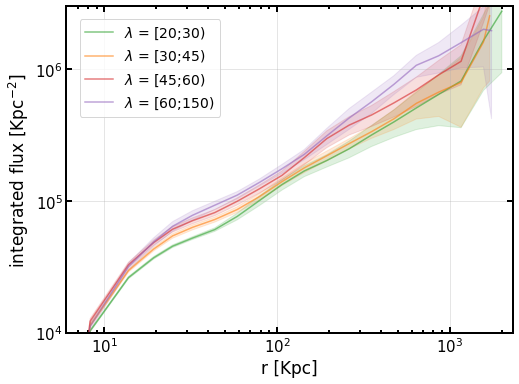

In [7]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')
plt.yscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']

zz = list(np.arange(4))
zz_up = list(np.arange(4))
zz_low = list(np.arange(4))
for i in range(4):
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, up, low, color=colors[i], alpha=0.15, label='')
    
    nn = [15,50,150, 300, 500]
    
    zz[i] = [np.interp(nn[0], r_red, mea),
             np.interp(nn[1], r_red, mea),
             np.interp(nn[2], r_red, mea),
             np.interp(nn[3], r_red, mea), #]
             np.interp(nn[4], r_red, mea)]
    
    zz_up[i] = [np.interp(nn[0], r_red, up),
             np.interp(nn[1], r_red, up),
             np.interp(nn[2], r_red, up),
             np.interp(nn[3], r_red, up), #]
             np.interp(nn[4], r_red, up)]
    
    zz_low[i] = [np.interp(nn[0], r_red, low),
             np.interp(nn[1], r_red, low),
             np.interp(nn[2], r_red, low),
             np.interp(nn[3], r_red, low), #]
             np.interp(nn[4], r_red, low)]
    

plt.ylabel('integrated flux [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.yscale('symlog')
plt.xlim(6, 2.3e3)
plt.ylim(1e4, 3e6)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
     
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


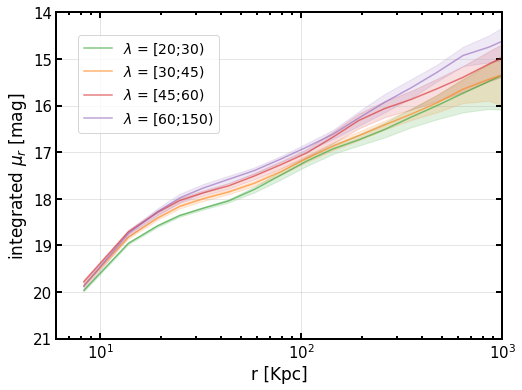

In [36]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    
    
    plt.plot(r_red, mag, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red, mag_up, mag_low, color=colors[i], alpha=0.15, label='')

plt.ylabel('integrated $\mu_{r}$ [mag]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.ylim(21,14)
plt.xlim(2,1000)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.05, 0.93), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


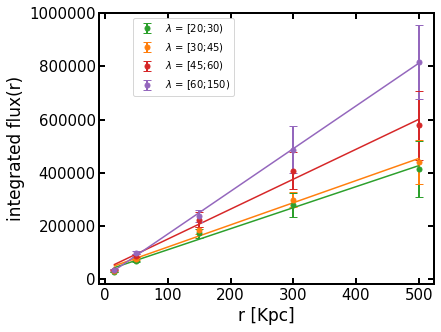

In [9]:
#30 100 500

fig = plt.figure(figsize=(6,5))  
ax = plt.subplot(1,1,1)

str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             '$\lambda$ = [60;150)']
colors = ['C2','C1','C3','C4']

#shift = [-0.5,0.5,-0.5,0.5]

for i in range(4):
    
    #zz_ = np.insert(zz[i], 0, 0)
    #sub_zz = zz_[1:]-zz_[:-1]
    
    ulimit =np.array(zz_up[i])-np.array(zz[i])
    llimit =np.array(zz[i])-np.array(zz_low[i])
       
    #plt.plot(nn, sub_zz, 'o-', label=str_ngals[i], color=colors[i])
    #plt.plot(nn, zz[i], 'o-', label=str_ngals[i], color=colors[i])
    
    plt.errorbar(np.array(nn), zz[i], yerr=[ulimit,llimit], color=colors[i], fmt='.',label=str_ngals[i], markersize='10', ecolor=colors[i],capsize=4, elinewidth=2)
    coef1 = np.polyfit(nn, zz[i], 1)
    plt.plot(nn, coef1[0]*np.array(nn)+coef1[1], '-', color=colors[i], label='')

plt.xlabel('r [Kpc]', fontsize=17)
plt.ylabel('integrated flux(r)', fontsize=17)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.ylim(0.1, 100)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.legend(bbox_to_anchor=(0.1, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()

 
70.2721477659702 29380.0865687033
corr coef 0.7092043897394049
380.361724855764 62877.540963279615
corr coef 0.9382100376650633
774.2879930199741 162061.62058096085
corr coef 0.8837752205185253
2619.0951760682115 224219.43440741152
corr coef 0.9468217088529044
5177.4964718463125 278488.46008002205
corr coef 0.9908967141709001


/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


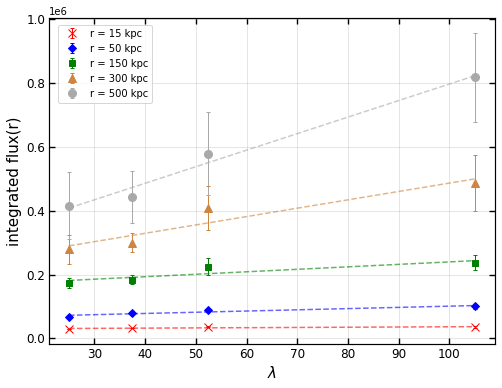

In [10]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""

    # Compute correlation matrix
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

symbols = ['x', 'D', 's','^','o', ]
symbolsize = ['8','5','6','8','8']


fig = plt.figure(figsize=(8,6))       
ax1 = plt.subplot(1,1,1)
#plt.xscale('log')
#plt.yscale('log')
plt.grid(alpha=0.4)

rr=[25,37.5,52.5,100]
rr=[(20+30)/2,(30+45)/2,(45+60)/2,(60+150)/2]
str_ngals = ['r = %i kpc'%(nn[0]),
             'r = %i kpc'%(nn[1]),
             'r = %i kpc'%(nn[2]),
             'r = %i kpc'%(nn[3]), #]
             'r = %i kpc'%(nn[4])]


print(' ')
for i in range(5):
    #colors = ['navy','mediumorchid', 'violet', 'hotpink', 'red']
    colors = ['red','blue', 'green', 'peru', 'darkgrey']
    ulimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    llimit = np.array(zz).T[i]-np.array(zz_low).T[i]
    
   #plt.plot(rr, np.array(zz).T[i], 'o', label=str_ngals[i], color=colors[i])
    coef1 = np.polyfit(rr, np.array(zz).T[i], 1)
    print(coef1[0], coef1[1])
    
    cor = pearson_r(rr, np.array(zz).T[i])
    print('corr coef', cor)
    
    plt.errorbar(rr, np.array(zz).T[i], yerr=[ulimit,llimit], color=colors[i], fmt=symbols[i],
                 label=str_ngals[i], markersize=symbolsize[i], ecolor=colors[i],capsize=2, elinewidth=1.)
    
    plt.plot(rr, coef1[0]*np.array(rr)+coef1[1], '--',label='', lw=1.5,color=colors[i], alpha=0.6)

plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('integrated flux(r)', fontsize=15)
plt.tick_params(direction='in',which='major', length=6, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ylim(0.1, 100)
[ax1.spines[axis].set_linewidth(1.2) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0.25)
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.savefig(save_dir_rdmp+'paper_figures/'+'rrdep_unm.png', format='png', dpi=300)
plt.show()
##############################################################################

789.4958711692799 32438.70245360134
831.5555023193327 38383.12508883626
1124.2170436120318 38987.412373786625
1604.2790651940015 9800.929854739805
 
70.2721477659702 29380.0865687033
380.361724855764 62877.540963279615
774.2879930199741 162061.62058096085
2619.0951760682115 224219.43440741152
5177.4964718463125 278488.46008002205


/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


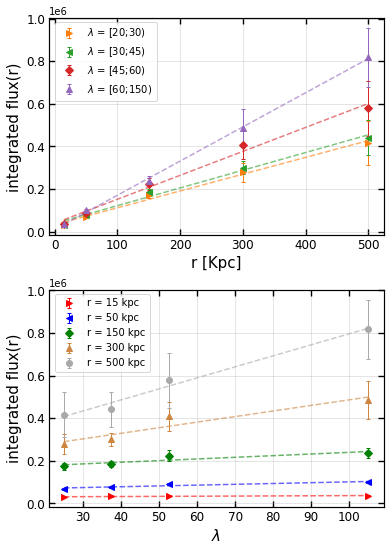

In [11]:

fig = plt.figure(figsize=(6,9))   
ax1 = plt.subplot(2,1,1)
#plt.xscale('log')
#plt.yscale('log')
plt.grid(alpha=0.4)
 
str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             '$\lambda$ = [60;150)']
symbols = ['>', '<', 'D', '^', 'o',]


for i in range(4):
    
    #zz_ = np.insert(zz[i], 0, 0)
    #sub_zz = zz_[1:]-zz_[:-1]
    colors = ['C1','C2','C3','C4','C5']
    
    ulimit =np.array(zz_up[i])-np.array(zz[i])
    llimit =np.array(zz[i])-np.array(zz_low[i])
       
    #plt.plot(nn, sub_zz, 'o-', label=str_ngals[i], color=colors[i])
    #plt.plot(nn, zz[i], 'o-', label=str_ngals[i], color=colors[i])
    
    plt.errorbar(np.array(nn), zz[i], yerr=[ulimit,llimit], color=colors[i], fmt=symbols[i], lw=1.5, label=str_ngals[i], markersize='6', ecolor=colors[i],capsize=2, elinewidth=1)
    coef1 = np.polyfit(nn, zz[i], 1)
    print(coef1[0], coef1[1])
    plt.plot(nn, coef1[0]*np.array(nn)+coef1[1], '--', lw=1.5, color=colors[i], label='', alpha=0.6)

plt.xlabel('r [Kpc]', fontsize=15)
plt.ylabel('integrated flux(r)', fontsize=15)
plt.tick_params(direction='in',which='major', length=6, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ylim(0.1, 100)
[ax1.spines[axis].set_linewidth(1.2) for axis in ['top','bottom','left','right']]
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)
    
    
ax2 = plt.subplot(2,1,2)
#plt.xscale('log')
#plt.yscale('log')
plt.grid(alpha=0.4)

rr=[25,37.5,52.5,100]
rr=[(20+30)/2,(30+45)/2,(45+60)/2,(60+150)/2]
str_ngals = ['r = %i kpc'%(nn[0]),
             'r = %i kpc'%(nn[1]),
             'r = %i kpc'%(nn[2]),
             'r = %i kpc'%(nn[3]), #]
             'r = %i kpc'%(nn[4])]


print(' ')
for i in range(5):
    #colors = ['navy','mediumorchid', 'violet', 'hotpink', 'red']
    colors = ['red','blue', 'green', 'peru', 'darkgrey']
    ulimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    llimit = np.array(zz).T[i]-np.array(zz_low).T[i]
    
    plt.errorbar(rr, np.array(zz).T[i], yerr=[ulimit,llimit], color=colors[i], fmt=symbols[i],label=str_ngals[i], markersize='6', ecolor=colors[i],capsize=2, elinewidth=1.)
    
    #plt.plot(rr, np.array(zz).T[i], 'o', label=str_ngals[i], color=colors[i])
    coef1 = np.polyfit(rr, np.array(zz).T[i], 1)
    print(coef1[0], coef1[1])
    plt.plot(rr, coef1[0]*np.array(rr)+coef1[1], '--',label='', lw=1.5,color=colors[i], alpha=0.6)

plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('integrated flux(r)', fontsize=15)
plt.tick_params(direction='in',which='major', length=6, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ylim(0.1, 100)
[ax2.spines[axis].set_linewidth(1.2) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0.25)
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

 
70.2721477659702 29380.0865687033
corr coef 0.7092043897394049
380.361724855764 62877.540963279615
corr coef 0.9382100376650633
774.2879930199741 162061.62058096085
corr coef 0.8837752205185253
2619.0951760682115 224219.43440741152
corr coef 0.9468217088529044
5177.4964718463125 278488.46008002205
corr coef 0.9908967141709001


/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


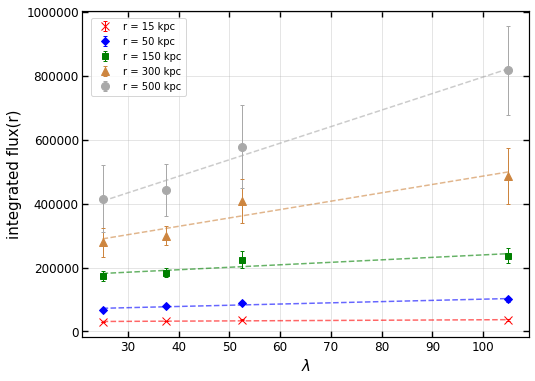

In [8]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""

    # Compute correlation matrix
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

symbols = ['x', 'D', 's','^','o', ]
symbolsize = ['8','5','6','8','8']


fig = plt.figure(figsize=(8,6))       
ax1 = plt.subplot(1,1,1)
#plt.xscale('log')
#plt.yscale('log')
plt.grid(alpha=0.4)

rr=[25,37.5,52.5,100]
rr=[(20+30)/2,(30+45)/2,(45+60)/2,(60+150)/2]
str_ngals = ['r = %i kpc'%(nn[0]),
             'r = %i kpc'%(nn[1]),
             'r = %i kpc'%(nn[2]),
             'r = %i kpc'%(nn[3]), #]
             'r = %i kpc'%(nn[4])]


print(' ')
for i in range(5):
    #colors = ['navy','mediumorchid', 'violet', 'hotpink', 'red']
    colors = ['red','blue', 'green', 'peru', 'darkgrey']
    ulimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    llimit = np.array(zz).T[i]-np.array(zz_low).T[i]
    
   #plt.plot(rr, np.array(zz).T[i], 'o', label=str_ngals[i], color=colors[i])
    coef1 = np.polyfit(rr, np.array(zz).T[i], 1)
    print(coef1[0], coef1[1])
    
    cor = pearson_r(rr, np.array(zz).T[i])
    print('corr coef', cor)
    
    plt.errorbar(rr, np.array(zz).T[i], yerr=[ulimit,llimit], color=colors[i], fmt=symbols[i],
                 label=str_ngals[i], markersize=symbolsize[i], ecolor=colors[i],capsize=2, elinewidth=1.)
    
    plt.plot(rr, coef1[0]*np.array(rr)+coef1[1], '--',label='', lw=1.5,color=colors[i], alpha=0.6)

plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('integrated flux(r)', fontsize=15)
plt.tick_params(direction='in',which='major', length=6, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.ylim(0.1, 100)
[ax1.spines[axis].set_linewidth(1.2) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0.25)
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.savefig(save_dir_rdmp+'paper_figures/'+'rrdep_unm.png', format='png', dpi=300)
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


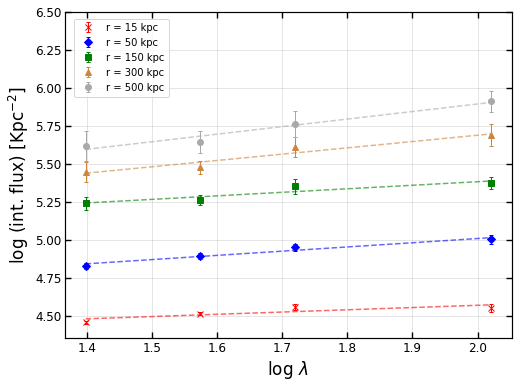

In [11]:


fig = plt.figure(figsize=(8,6))   
ax = plt.subplot(1,1,1)
#plt.xscale('log')
#plt.yscale('log')
plt.grid(alpha=0.4)

rr=[25,37.5,52.5,100]
rr=[(20+30)/2,(30+45)/2,(45+60)/2,(60+150)/2]
str_ngals = ['r = %i kpc'%(nn[0]),
             'r = %i kpc'%(nn[1]),
             'r = %i kpc'%(nn[2]),
             'r = %i kpc'%(nn[3]), #]
             'r = %i kpc'%(nn[4])]




print(' ')
for i in range(5):
    #colors = ['navy','mediumorchid', 'violet', 'hotpink', 'red']
    colors = ['red','blue', 'green', 'peru', 'darkgrey']
    ulimit = np.log10(np.array(zz_up).T[i])-np.log10(np.array(zz).T[i])
    llimit = np.log10(np.array(zz_up).T[i])-np.log10(np.array(zz).T[i])
    
  
    #plt.plot(rr, np.array(zz).T[i], 'o', label=str_ngals[i], color=colors[i])
    coef1 = np.polyfit(np.log10(rr), np.log10(np.array(zz).T[i]), 1)
    #print(coef1[0], coef1[1])

    
    
    plt.errorbar(np.log10(rr), np.log10(np.array(zz).T[i]), yerr=[ulimit,llimit], color=colors[i], 
                 fmt=symbols[i],label=str_ngals[i], markersize='6', 
                 ecolor=colors[i],capsize=2, elinewidth=1.)
  
    
    plt.plot(np.log10(rr), coef1[0]*np.log10(np.array(rr))+coef1[1], '--',label='', lw=1.5,color=colors[i], alpha=0.6)

plt.ylabel('log (int. flux) [Kpc$^{-2}$]', fontsize=17)
plt.xlabel('log $\lambda$ ', fontsize=17)
plt.tick_params(direction='in',which='major', length=6, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylim(4.35, 6.5)
[ax.spines[axis].set_linewidth(1.2) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0.25)
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

#plt.savefig(save_dir_rdmp+'paper_figures/'+'rrdep.png', format='png', dpi=300)
plt.show()
##############################################################################

 
slope = 0.137 intercept = 4.291 corr coef = 0.709
 
slope = 0.265 intercept = 4.475 corr coef = 0.938
 
slope = 0.223 intercept = 4.933 corr coef = 0.884
 
slope = 0.403 intercept = 4.880 corr coef = 0.947
 
slope = 0.515 intercept = 4.869 corr coef = 0.991
 


/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in power
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


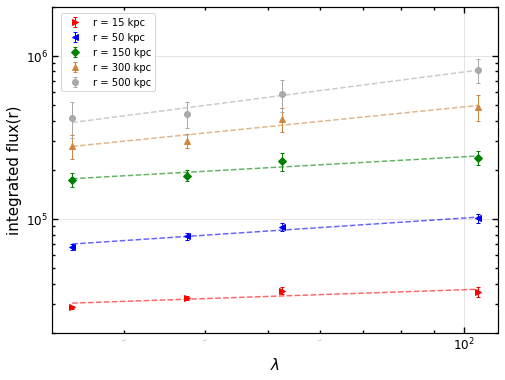

In [50]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""

    # Compute correlation matrix
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]




fig = plt.figure(figsize=(8,6))   
ax = plt.subplot(1,1,1)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)
nn = [15,50,150, 300, 500]
symbols = ['>', '<', 'D', '^', 'o',]

rr=[25,37.5,52.5,100]
rr=[(20+30)/2,(30+45)/2,(45+60)/2,(60+150)/2]
str_ngals = ['r = %i kpc'%(nn[0]),
             'r = %i kpc'%(nn[1]),
             'r = %i kpc'%(nn[2]),
             'r = %i kpc'%(nn[3]), #]
             'r = %i kpc'%(nn[4])]

from scipy.optimize import curve_fit
def loglog(xdata, slope, Yintercept):
    return 10**(slope*np.log10(xdata) + Yintercept)

print(' ')
for i in range(5):
    #colors = ['navy','mediumorchid', 'violet', 'hotpink', 'red']
    colors = ['red','blue', 'green', 'peru', 'darkgrey']
    ulimit = np.array(zz_up).T[i]-np.array(zz).T[i]
    llimit = np.array(zz).T[i]-np.array(zz_low).T[i]
    
  
    #plt.plot(rr, np.array(zz).T[i], 'o', label=str_ngals[i], color=colors[i])
    #coef1 = np.polyfit(np.log10(rr), np.log10(np.array(zz).T[i]), 1)
    popt, pcov = curve_fit(loglog, rr, np.array(zz).T[i])
    #print(coef1[0], coef1[1])
    
    
    coef1, coef2 = popt[0], popt[1]
    
    cor = pearson_r(rr, np.array(zz).T[i])
    
    
    print('slope = %.3f'%(popt[0])+' intercept = %.3f'%(popt[1])+' corr coef = %.3f'%(cor))
    print(' ')

    
    plt.errorbar(rr, np.array(zz).T[i], yerr=[ulimit,llimit], color=colors[i], fmt=symbols[i],label=str_ngals[i], markersize='6', ecolor=colors[i],capsize=2, elinewidth=1.)
  
    
    plt.plot(rr, 10**(coef1*np.array(np.log10(rr))+coef2), '--',label='', lw=1.5,color=colors[i], alpha=0.6)

plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('integrated flux(r)', fontsize=15)
plt.tick_params(direction='in',which='major', length=6, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=1.4, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylim(2e4, 2e6)
[ax.spines[axis].set_linewidth(1.2) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0.25)
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, fontsize=10,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.savefig(save_dir_rdmp+'paper_figures/'+'rrdep_unm.png', format='png', dpi=300)
plt.show()
##############################################################################

## Comparison

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


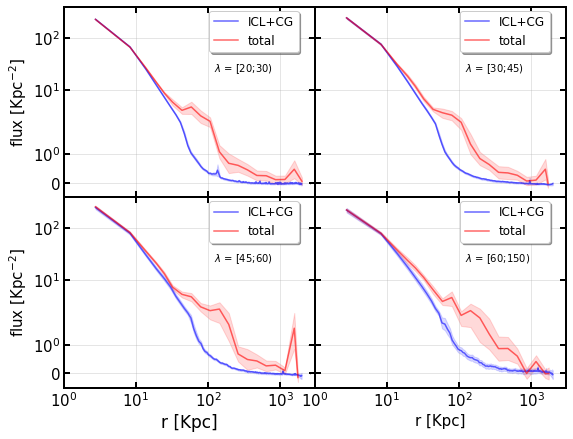

In [38]:

fig = plt.figure(figsize=(9,7))  

colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments.txt')    
    r_red1, mea_1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    mea1 = mea_1
    up1 = mea1+std1
    low1 = mea1-std1
    
    plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='blue',label='ICL+CG')
    plt.fill_between(r_red1, up1, low1, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_unmasked.txt')
    r_red, mea, std= jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]

    mea = mea
    up = mea+std
    low = mea-std
    
    plt.plot(r_red, mea, '-', lw=1.5,alpha=0.6,color='red',label='total') #str_ngals[i]
    plt.fill_between(r_red, up, low, color='red', alpha=0.15, label='')

    plt.ylim(-0.5,400)
    plt.xlim(1, 3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=0, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.58, 0.98), loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.6,0.66),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=17) 
plt.ylabel('flux [Kpc$^{-2}$]', fontsize=15) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: R

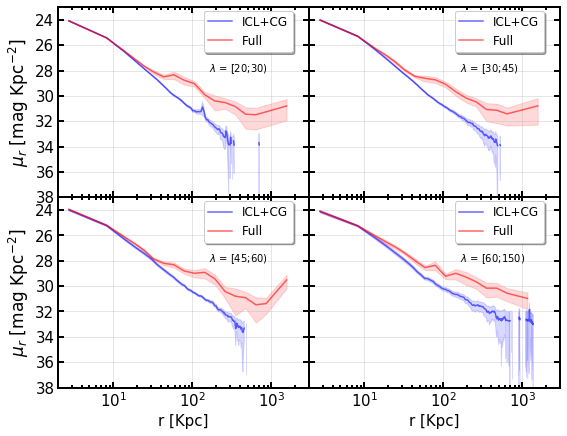

In [39]:


fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('symlog')

    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    

    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask_ = (mag_low1>-30000)
    

    
    
    #plt.plot(r_red1[mask_], mag1[mask_], '-', lw=1.5,alpha=0.6,color='grey',label='Full')
    #plt.fill_between(r_red1[mask_], mag_up1[mask_], mag_low1[mask_], color='grey', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    

    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    n_mag = []
    for l in range(len(mag_low0)):
        if str(mag_low0[l])=='nan':
            n_mag.append(mag_low0[l])
        else:
            n_mag.append(mag0[l])
    
    
    plt.plot(r_red0, n_mag, '-', lw=1.5,alpha=0.6,color='blue',label='ICL+CG')
    #plt.plot(r_red0[mask], mag0[mask], '-', lw=1.5,alpha=0.6,color='blue',label='ICL+CG')
    plt.fill_between(r_red0, mag_up0, mag_low0, color='blue', alpha=0.15, label='')
    #plt.fill_between(r_red0[mask], mag_up0[mask], mag_low0[mask], color='blue', alpha=0.15, label='')
    
    
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    

    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color='red',label='Full')
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color='red', alpha=0.15, label='')

    
    
    plt.ylim(38,23)
    plt.xlim(2,3000)
    plt.xticks(fontsize = 0)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.58, 0.98), loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.6,0.66),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


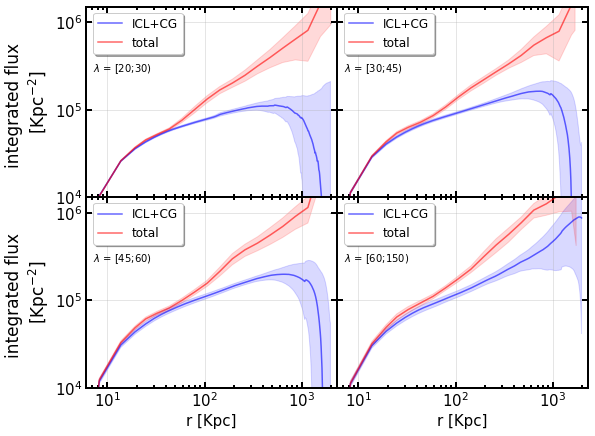

In [40]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    plt.plot(r_red1, mea1, '-', lw=1.5,alpha=0.6,color='blue',label='ICL+CG')
    plt.fill_between(r_red1, up1, low1, color='blue', alpha=0.15, label='')
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    plt.plot(r_red0, mea0, '-', lw=1.5,alpha=0.6,color='red',label='total')
    plt.fill_between(r_red0, up0, low0, color='red', alpha=0.15, label='')   
    


    plt.xticks(fontsize = 0)
    plt.yscale('symlog')
    plt.xlim(6, 2.3e3)
    plt.ylim(1e4, 1.5e6)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.03,0.66),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('integrated flux \n'+'[Kpc$^{-2}$]', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4

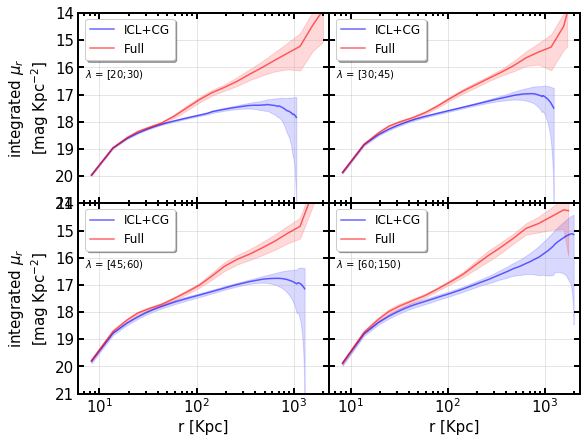

In [41]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up1 = mea1+std1
    low1 = mea1-std1
    
    mag1 = 30 - 2.5 * np.log10(mea1)
    mag_up1 = 30 - 2.5 *np.log10(up1)
    mag_low1 = 30 - 2.5 * np.log10(low1)
    mask = (mag_low1>-30000)
    
    
    plt.plot(r_red1[mask ], mag1[mask ], '-', lw=1.5,alpha=0.6,color='blue',label='ICL+CG')
    plt.fill_between(r_red1[mask ], mag_up1[mask ], mag_low1[mask ], color='blue', alpha=0.15, label='')
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up0 = mea0+std0
    low0 = mea0-std0
    
    mag0 = 30 - 2.5 * np.log10(mea0)
    mag_up0 = 30 - 2.5 *np.log10(up0)
    mag_low0 = 30 - 2.5 * np.log10(low0)
    mask = (mag_low0>-30000)
    
    
    plt.plot(r_red0[mask ], mag0[mask ], '-', lw=1.5,alpha=0.6,color='red',label='Full')
    plt.fill_between(r_red0[mask ], mag_up0[mask ], mag_low0[mask ], color='red', alpha=0.15, label='')
    
    
    plt.ylim(21,14)
    plt.xlim(6, 2.3e3)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1,frameon=True, shadow=True)
    
    plt.annotate(str_ngals[i],
                 xy=(0.03,0.66),xycoords='axes fraction',
                 fontsize=10)

plt.subplot(2,2,1)  
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15)
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mpl

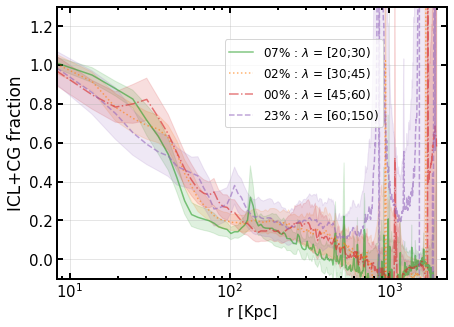

In [42]:

fig = plt.figure(figsize=(7,5))  
ax = plt.subplot(1,1,1)
plt.xscale('log')
#plt.yscale('log')
plt.grid(alpha=0.4)
colors = ['C2','C1','C3','C4']
lines = ['-',':','-.','--']

for i in range(4):
    

    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up1 = mea1+std1
    #low1 = mea1-std1
    
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up0 = mea0+std0
    #low0 = mea0-std0

    interp_mean0 = np.interp(r_red1, r_red0, mea0)
    interp_sigma0 = np.interp(r_red1, r_red0, std0)
    
    
    
    import uncertainties as unc  
    import uncertainties.unumpy as unumpy  
    import numpy as np 
    #import nemmen  

    # Defines x and y  
    x=mea1  
    y=interp_mean0 

    # Defines the error arrays, values follow a normal distribution  
    # (method random_normal defined in http://astropython.blogspot.com/2012/04/how-to-generate-array-of-random-numbers.html)  
    errx=std1
    erry=interp_sigma0

    # Defines special arrays holding the values *and* errors  
    x=unumpy.uarray(( x, errx ))  
    y=unumpy.uarray(( y, erry ))  
    
    z=x[1:]/y[1:]
    mean = unumpy.nominal_values(z)
    
    # Print the propagated error errz  
    std=unumpy.std_devs(z)
    
    up = mean+std
    low = mean-std


    index = list(r_red1).index(702.50238)
    frac = (mean)[index]
    
    
    plt.plot(r_red1[1:], mean, lines[i], lw=1.5,alpha=0.6,color=colors[i],label=('%.2f'%(frac)).split('.')[-1]+'%'+' : '+str_ngals[i])
    plt.fill_between(r_red1[1:], up, low, color=colors[i], alpha=0.15, label='')  
    

    
    plt.xticks(fontsize = 0)
    #plt.yscale('symlog')
    plt.xlim(-100, 2.3e3)
    plt.ylim(-0.1, 1.3)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.43, 0.88),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1)
    


      


plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('ICL+CG fraction', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.savefig(save_dir_rdmp+'paper_figures/'+'icl_frac.png', format='png', dpi=300)
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mpl

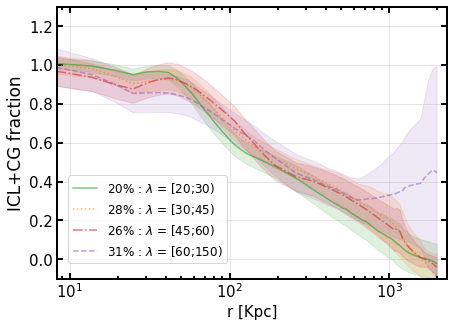

In [43]:

fig = plt.figure(figsize=(7,5))  
ax = plt.subplot(1,1,1)
plt.xscale('log')
#plt.yscale('log')
plt.grid(alpha=0.4)
colors = ['C2','C1','C3','C4']
lines = ['-',':','-.','--']

for i in range(4):
    

    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up1 = mea1+std1
    #low1 = mea1-std1
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up0 = mea0+std0
    #low0 = mea0-std0

    interp_mean0 = np.interp(r_red1, r_red0, mea0)
    interp_sigma0 = np.interp(r_red1, r_red0, std0)
    
    
    
    import uncertainties as unc  
    import uncertainties.unumpy as unumpy  
    import numpy as np 
    #import nemmen  

    # Defines x and y  
    x=mea1  
    y=interp_mean0 

    # Defines the error arrays, values follow a normal distribution  
    # (method random_normal defined in http://astropython.blogspot.com/2012/04/how-to-generate-array-of-random-numbers.html)  
    errx=std1
    erry=interp_sigma0

    # Defines special arrays holding the values *and* errors  
    x=unumpy.uarray(( x, errx ))  
    y=unumpy.uarray(( y, erry ))  
    
    z=x[1:]/y[1:]
    mean = unumpy.nominal_values(z)
    
    # Print the propagated error errz  
    std=unumpy.std_devs(z)
    
    up = mean+std
    low = mean-std


    index = list(r_red1).index(702.50238)
    frac = (mean)[index]
    
    
    plt.plot(r_red1[1:], mean, lines[i], lw=1.5,alpha=0.6,color=colors[i],label=('%.2f'%(frac)).split('.')[-1]+'%'+' : '+str_ngals[i])
    plt.fill_between(r_red1[1:], up, low, color=colors[i], alpha=0.15, label='')  
    

    
    plt.xticks(fontsize = 0)
    #plt.yscale('symlog')
    plt.xlim(-100, 2.3e3)
    plt.ylim(-0.1, 1.3)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1)
    


      


plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('ICL+CG fraction', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.savefig(save_dir_rdmp+'paper_figures/'+'icl_frac.png', format='png', dpi=300)
plt.show()
##############################################################################

In [44]:
(23+33+27+33)/4

29.0

In [45]:
def rm_mrr(Lambda): #McClintock relation
    X_piv, z_piv = 40., 0.35
    A0, B0, C0, Z0 = 14.489,  1.356, -0.30, 0.275
    return (10.**A0) * ((Lambda/ X_piv)**B0)  * (((1+Z0) / (1+z_piv)) **(C0))
def criticaldens(z): # Critical density function  
    from astropy import units as u
    SolarM = u.Msun # solar masses
    kpc3 = u.kpc * u.kpc * u.kpc # Mpc^3
    Conv_factor = SolarM / kpc3
    rhoc_ = cosmo.critical_density(z)
    rhoc = rhoc_.to(Conv_factor)
    return rhoc

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mpl

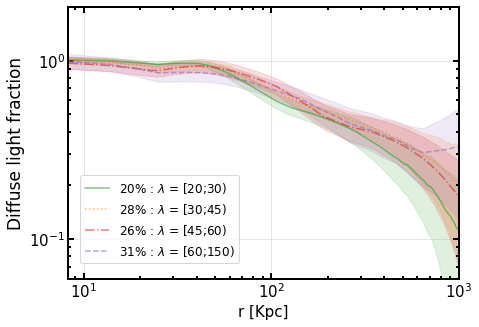

In [53]:

fig = plt.figure(figsize=(7,5))  
ax = plt.subplot(1,1,1)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)
colors = ['C2','C1','C3','C4']
lines = ['-',':','-.','--']

for i in range(4):
    

    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up1 = mea1+std1
    #low1 = mea1-std1
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up0 = mea0+std0
    #low0 = mea0-std0

    interp_mean0 = np.interp(r_red1, r_red0, mea0)
    interp_sigma0 = np.interp(r_red1, r_red0, std0)
    
    
    
    import uncertainties as unc  
    import uncertainties.unumpy as unumpy  
    import numpy as np 
    #import nemmen  

    # Defines x and y  
    x=mea1  
    y=interp_mean0 

    # Defines the error arrays, values follow a normal distribution  
    # (method random_normal defined in http://astropython.blogspot.com/2012/04/how-to-generate-array-of-random-numbers.html)  
    errx=std1
    erry=interp_sigma0

    # Defines special arrays holding the values *and* errors  
    x=unumpy.uarray(( x, errx ))  
    y=unumpy.uarray(( y, erry ))  
    
    z=x[1:]/y[1:]
    mean = unumpy.nominal_values(z)
    
    # Print the propagated error errz  
    std=unumpy.std_devs(z)
    
    up = mean+std
    low = mean-std


    index = list(r_red1).index(702.50238)
    frac = (mean)[index]
    
    
    plt.plot(r_red1[1:], mean, lines[i], lw=1.5,alpha=0.6,color=colors[i],label=('%.2f'%(frac)).split('.')[-1]+'%'+' : '+str_ngals[i])
    plt.fill_between(r_red1[1:], up, low, color=colors[i], alpha=0.15, label='')  
    

    
    plt.xticks(fontsize = 0)
    #plt.yscale('symlog')
    plt.xlim(-100, 1000.)
    #plt.ylim(-0.1, 1.3)
    plt.ylim(0.06, 2.)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1)
    


      


plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('Diffuse light fraction', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.savefig(save_dir_rdmp+'paper_figures/'+'icl_frac.png', format='png', dpi=300)
plt.show()
##############################################################################

In [47]:
def rm_mrr(Lambda): #McClintock relation
    X_piv, z_piv = 40., 0.35
    A0, B0, C0, Z0 = 14.489,  1.356, -0.30, 0.275
    return (10.**A0) * ((Lambda/ X_piv)**B0)  * (((1+Z0) / (1+z_piv)) **(C0))
def criticaldens(z): # Critical density function  
    from astropy import units as u
    SolarM = u.Msun # solar masses
    kpc3 = u.kpc * u.kpc * u.kpc # Mpc^3
    Conv_factor = SolarM / kpc3
    rhoc_ = cosmo.critical_density(z)
    rhoc = rhoc_.to(Conv_factor)
    return rhoc

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:98: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:99: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


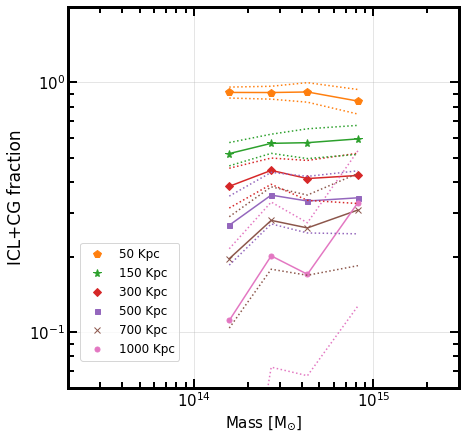

In [22]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
fig = plt.figure(figsize=(7,7))  
ax = plt.subplot(1,1,1)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)
colors = ['C2','C1','C3','C4']
lines = ['-',':','-.','--']
symbols = ['>', '<', 'D', '^', 'o',]


frac = []

M200m = []
ulimit = []
llimit = []


r50 = []
r150 = []
r300 = []
r500 = []
r700 = []
r1000 = []
r50_u = []
r150_u = []
r300_u = []
r500_u = []
r700_u = []
r1000_u = []
r50_l = []
r150_l = []
r300_l = []
r500_l = []
r700_l = []
r1000_l = []

for i in range(4):
    

    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up1 = mea1+std1
    #low1 = mea1-std1
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up0 = mea0+std0
    #low0 = mea0-std0

    interp_mean0 = np.interp(r_red1, r_red0, mea0)
    interp_sigma0 = np.interp(r_red1, r_red0, std0)
    
    
    # clusters: m200 and r200
    lambdamean = [24.061209, 35.77201, 50.39139, 81.282715]
    lambda_= lambdamean[i]
    m200m = rm_mrr(np.array(lambda_))  
    rhoc = criticaldens(0.275)        
    rhoc_prop = rhoc  #* (cosmo.h**2)
    rhom = cosmo.Om0 * rhoc_prop * (1 + 0.275)**3
    r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) )  
    
    M200m.append(m200m)
    
    
    import uncertainties as unc  
    import uncertainties.unumpy as unumpy  
    import numpy as np 
    #import nemmen  

    # Defines x and y  
    x=mea1  
    y=interp_mean0 

    # Defines the error arrays, values follow a normal distribution  
    # (method random_normal defined in http://astropython.blogspot.com/2012/04/how-to-generate-array-of-random-numbers.html)  
    errx=std1
    erry=interp_sigma0

    # Defines special arrays holding the values *and* errors  
    x=unumpy.uarray(( x, errx ))  
    y=unumpy.uarray(( y, erry ))  
    
    z=x[1:]/y[1:]
    mean = unumpy.nominal_values(z)
    
    # Print the propagated error errz  
    std=unumpy.std_devs(z)
    
    up = mean+std
    low = mean-std


    index = list(r_red1[1:]).index(702.50238)
    frac.append(mean[index])

    
    ulimit.append(up[index])
    llimit.append(low[index])
    
    
    r50_ = np.interp(50, r_red1[1:],mean)
    r150_ = np.interp(150, r_red1[1:],mean)
    r300_ = np.interp(300, r_red1[1:],mean)
    r500_ = np.interp(500, r_red1[1:],mean)
    r700_ = np.interp(700, r_red1[1:],mean)
    r1000_ = np.interp(1000, r_red1[1:],mean)
    
    r50.append(r50_)
    r150.append(r150_)
    r300.append(r300_)
    r500.append(r500_)
    r700.append(r700_)
    r1000.append(r1000_)
    
    
    r50_up = np.interp(50, r_red1[1:],up)
    r150_up = np.interp(150, r_red1[1:],up)
    r300_up = np.interp(300, r_red1[1:],up)
    r500_up = np.interp(500, r_red1[1:],up)
    r700_up = np.interp(700, r_red1[1:],up)
    r1000_up = np.interp(1000, r_red1[1:],up)
    
    r50_u.append(r50_up)
    r150_u.append(r150_up)
    r300_u.append(r300_up)
    r500_u.append(r500_up)
    r700_u.append(r700_up)
    r1000_u.append(r1000_up)
    
    
    
    r50_low = np.interp(50, r_red1[1:],low)
    r150_low = np.interp(150, r_red1[1:],low)
    r300_low = np.interp(300, r_red1[1:],low)
    r500_low = np.interp(500, r_red1[1:],low)
    r700_low = np.interp(700, r_red1[1:],low)
    r1000_low = np.interp(1000, r_red1[1:],low)
    
    r50_l.append(r50_low)
    r150_l.append(r150_low)
    r300_l.append(r300_low)
    r500_l.append(r500_low)
    r700_l.append(r700_low)
    r1000_l.append(r1000_low)

    
    
    #plt.plot(r_red1[1:], mean, lines[i], lw=1.5,alpha=0.6,color=colors[i],label=('%.2f'%(frac)).split('.')[-1]+'%'+' : '+str_ngals[i])
    #plt.fill_between(r_red1[1:], up, low, color=colors[i], alpha=0.15, label='')  
    
#plt.errorbar(M200m, frac, yerr=[ulimit,llimit], fmt='o', color='blue', markersize='6', ecolor='blue',capsize=2, elinewidth=1.)

col = ['C1','C2','C3','C4','C5','C6',]
lab = ['50 Kpc', '150 Kpc', '300 Kpc', '500 Kpc', '700 Kpc', '1000 Kpc', ]
fmts = ['p', '*', 'D', 's', 'x', 'o']
mkse = ['8', '8', '6', '5', '6', '5']

#plt.errorbar(M200m, r50, yerr=[r50_u,r50_l], fmt='p', color=col[0], markersize='6', ecolor=col[0],capsize=2, elinewidth=1., label=lab[0])
#plt.errorbar(M200m, r150, yerr=[r150_u,r150_l], fmt='*', color=col[1], markersize='6', ecolor=col[1],capsize=2, elinewidth=1., label=lab[1])
#plt.errorbar(M200m, r300, yerr=[r300_u,r300_l], fmt='D', color=col[2], markersize='6', ecolor=col[2],capsize=2, elinewidth=1., label=lab[2])
#plt.errorbar(M200m, r500, yerr=[r500_u,r500_l], fmt='s', color=col[3], markersize='6', ecolor=col[3],capsize=2, elinewidth=1., label=lab[3])
#plt.errorbar(M200m, r700, yerr=[r700_u,r700_l], fmt='x', color=col[4], markersize='6', ecolor=col[4],capsize=2, elinewidth=1., label=lab[4])
#plt.errorbar(M200m, r1000, yerr=[r1000_u,r1000_l], fmt='o', color=col[5], markersize='6', ecolor=col[5],capsize=2, elinewidth=1., label=lab[5])      

radius_ = [r50, r150, r300, r500, r700, r1000]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], '-', color=col[jj])
    
radius_ = [r50, r150, r300, r500, r700, r1000]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], fmts[jj], color=col[jj], markersize=mkse[jj], label=lab[jj])
    
radius_ = [r50_u, r150_u, r300_u, r500_u, r700_u, r1000_u]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], ':', color=col[jj])
    
radius_ = [r50_l, r150_l, r300_l, r500_l, r700_l, r1000_l]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], ':', color=col[jj])


#plt.yscale('symlog')
plt.xlim(2e13, 3e15)
plt.ylim(0.06, 2.)
plt.tick_params(direction='in',which='major', length=9, width=2, labelsize=0.3,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=6, width=2, labelsize=0.3,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(3.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)

#plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
#           numpoints=1,scatterpoints=1)
    


      


plt.xlabel('Mass [M$_{\odot}$]', fontsize=15) 
plt.ylabel('ICL+CG fraction', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
           numpoints=1,scatterpoints=1)
plt.savefig(save_dir_rdmp+'paper_figures/'+'icl_frac_mass.png', format='png', dpi=300)
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:107: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


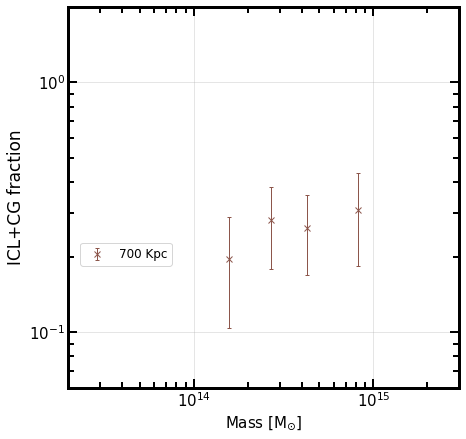

In [23]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
fig = plt.figure(figsize=(7,7))  
ax = plt.subplot(1,1,1)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)
colors = ['C2','C1','C3','C4']
lines = ['-',':','-.','--']
symbols = ['>', '<', 'D', '^', 'o',]


frac = []

M200m = []
ulimit = []
llimit = []


r50 = []
r150 = []
r300 = []
r500 = []
r700 = []
r1000 = []
r50_u = []
r150_u = []
r300_u = []
r500_u = []
r700_u = []
r1000_u = []
r50_l = []
r150_l = []
r300_l = []
r500_l = []
r700_l = []
r1000_l = []
r50_s = []
r150_s = []
r300_s = []
r500_s = []
r700_s = []
r1000_s = []



for i in range(4):
    

    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up1 = mea1+std1
    #low1 = mea1-std1
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up0 = mea0+std0
    #low0 = mea0-std0

    interp_mean0 = np.interp(r_red1, r_red0, mea0)
    interp_sigma0 = np.interp(r_red1, r_red0, std0)
    
    
    # clusters: m200 and r200
    lambdamean = [24.061209, 35.77201, 50.39139, 81.282715]
    lambda_= lambdamean[i]
    m200m = rm_mrr(np.array(lambda_))  
    rhoc = criticaldens(0.275)        
    rhoc_prop = rhoc  #* (cosmo.h**2)
    rhom = cosmo.Om0 * rhoc_prop * (1 + 0.275)**3
    r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) )  

    
    M200m.append(m200m)
    
    
    import uncertainties as unc  
    import uncertainties.unumpy as unumpy  
    import numpy as np 
    #import nemmen  

    # Defines x and y  
    x=mea1  
    y=interp_mean0 

    # Defines the error arrays, values follow a normal distribution  
    # (method random_normal defined in http://astropython.blogspot.com/2012/04/how-to-generate-array-of-random-numbers.html)  
    errx=std1
    erry=interp_sigma0

    # Defines special arrays holding the values *and* errors  
    x=unumpy.uarray(( x, errx ))  
    y=unumpy.uarray(( y, erry ))  
    
    z=x[1:]/y[1:]
    mean = unumpy.nominal_values(z)
    
    # Print the propagated error errz  
    std=unumpy.std_devs(z)
    
    up = mean+std
    low = mean-std


    index = list(r_red1[1:]).index(702.50238)
    frac.append(mean[index])

    
    ulimit.append(up[index])
    llimit.append(low[index])
    
    
    
    
    
    r50_ = np.interp(50, r_red1[1:],mean)
    r150_ = np.interp(150, r_red1[1:],mean)
    r300_ = np.interp(300, r_red1[1:],mean)
    r500_ = np.interp(500, r_red1[1:],mean)
    r700_ = np.interp(700, r_red1[1:],mean)
    r1000_ = np.interp(1000, r_red1[1:],mean)
    
    r50.append(r50_)
    r150.append(r150_)
    r300.append(r300_)
    r500.append(r500_)
    r700.append(r700_)
    r1000.append(r1000_)
    
    
    r50_up = np.interp(50, r_red1[1:],up)
    r150_up = np.interp(150, r_red1[1:],up)
    r300_up = np.interp(300, r_red1[1:],up)
    r500_up = np.interp(500, r_red1[1:],up)
    r700_up = np.interp(700, r_red1[1:],up)
    r1000_up = np.interp(1000, r_red1[1:],up)
    
    r50_u.append(r50_up)
    r150_u.append(r150_up)
    r300_u.append(r300_up)
    r500_u.append(r500_up)
    r700_u.append(r700_up)
    r1000_u.append(r1000_up)
    
    
    
    r50_low = np.interp(50, r_red1[1:],low)
    r150_low = np.interp(150, r_red1[1:],low)
    r300_low = np.interp(300, r_red1[1:],low)
    r500_low = np.interp(500, r_red1[1:],low)
    r700_low = np.interp(700, r_red1[1:],low)
    r1000_low = np.interp(1000, r_red1[1:],low)
    
    r50_l.append(r50_low)
    r150_l.append(r150_low)
    r300_l.append(r300_low)
    r500_l.append(r500_low)
    r700_l.append(r700_low)
    r1000_l.append(r1000_low)
    
    
    r50_std = np.interp(50, r_red1[1:],std)
    r150_std = np.interp(150, r_red1[1:],std)
    r300_std = np.interp(300, r_red1[1:],std)
    r500_std = np.interp(500, r_red1[1:],std)
    r700_std = np.interp(700, r_red1[1:],std)
    r1000_std = np.interp(1000, r_red1[1:],std)
    
    r50_s.append(r50_std)
    r150_s.append(r150_std)
    r300_s.append(r300_std)
    r500_s.append(r500_std)
    r700_s.append(r700_std)
    r1000_s.append(r1000_std)

    
    
    #plt.plot(r_red1[1:], mean, lines[i], lw=1.5,alpha=0.6,color=colors[i],label=('%.2f'%(frac)).split('.')[-1]+'%'+' : '+str_ngals[i])
    #plt.fill_between(r_red1[1:], up, low, color=colors[i], alpha=0.15, label='')  
    
#plt.errorbar(M200m, frac, yerr=[ulimit,llimit], fmt='o', color='blue', markersize='6', ecolor='blue',capsize=2, elinewidth=1.)

col = ['C1','C2','C3','C4','C5','C6',]
lab = ['50 Kpc', '150 Kpc', '300 Kpc', '500 Kpc', '700 Kpc', '1000 Kpc', ]
fmts = ['p', '*', 'D', 's', 'x', 'o']
mkse = ['8', '8', '6', '5', '6', '5']


up = np.array(r700_s)
low = np.array(r700_s)

#plt.errorbar(M200m, r50, yerr=[r50_u,r50_l], fmt='p', color=col[0], markersize='6', ecolor=col[0],capsize=2, elinewidth=1., label=lab[0])
#plt.errorbar(M200m, r150, yerr=[r150_u,r150_l], fmt='*', color=col[1], markersize='6', ecolor=col[1],capsize=2, elinewidth=1., label=lab[1])
#plt.errorbar(M200m, r300, yerr=[r300_u,r300_l], fmt='D', color=col[2], markersize='6', ecolor=col[2],capsize=2, elinewidth=1., label=lab[2])
#plt.errorbar(M200m, r500, yerr=[r500_u,r500_l], fmt='s', color=col[3], markersize='6', ecolor=col[3],capsize=2, elinewidth=1., label=lab[3])
plt.errorbar(M200m, r700, yerr=[up,low], fmt=fmts[4], color=col[4], markersize=mkse[4], ecolor=col[4],capsize=2, elinewidth=1., label=lab[4])
#plt.errorbar(M200m, r1000, yerr=[r1000_u,r1000_l], fmt='o', color=col[5], markersize='6', ecolor=col[5],capsize=2, elinewidth=1., label=lab[5])      



#plt.yscale('symlog')
plt.xlim(2e13, 3e15)
plt.ylim(0.06, 2.)
plt.tick_params(direction='in',which='major', length=9, width=2, labelsize=0.3,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=6, width=2, labelsize=0.3,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(3.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)

#plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
#           numpoints=1,scatterpoints=1)
    


      


plt.xlabel('Mass [M$_{\odot}$]', fontsize=15) 
plt.ylabel('ICL+CG fraction', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
           numpoints=1,scatterpoints=1)
plt.savefig(save_dir_rdmp+'paper_figures/'+'icl_frac_mass.png', format='png', dpi=300)
plt.show()
##############################################################################

438.07221504869256 kpc / solMass(1/3)
524.073034965869 kpc / solMass(1/3)
611.8645447358936 kpc / solMass(1/3)
759.4678788376378 kpc / solMass(1/3)


/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:103: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:104: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


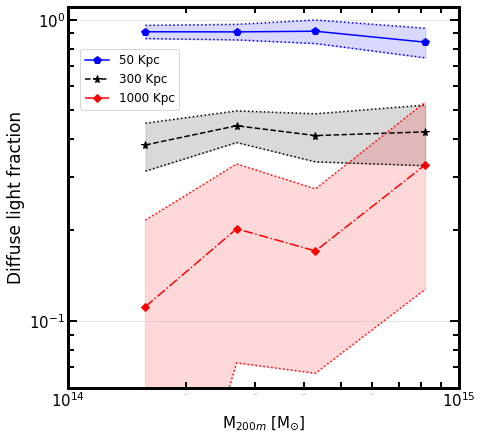

In [24]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
fig = plt.figure(figsize=(7,7))  
ax = plt.subplot(1,1,1)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)
colors = ['C2','C1','C3','C4']
lines = ['-',':','-.','--']
symbols = ['>', '<', 'D', '^', 'o',]


frac = []

M200m = []
ulimit = []
llimit = []


r50 = []
r150 = []
r300 = []
r500 = []
r700 = []
r1000 = []
r50_u = []
r150_u = []
r300_u = []
r500_u = []
r700_u = []
r1000_u = []
r50_l = []
r150_l = []
r300_l = []
r500_l = []
r700_l = []
r1000_l = []

r_1_2 = []
r_1_2_u = []
r_1_2_l = []

for i in range(4):
    

    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up1 = mea1+std1
    #low1 = mea1-std1
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up0 = mea0+std0
    #low0 = mea0-std0

    interp_mean0 = np.interp(r_red1, r_red0, mea0)
    interp_sigma0 = np.interp(r_red1, r_red0, std0)
    
    
    # clusters: m200 and r200
    lambdamean = [24.061209, 35.77201, 50.39139, 81.282715]
    lambda_= lambdamean[i]
    m200m = rm_mrr(np.array(lambda_))  
    rhoc = criticaldens(0.275)        
    rhoc_prop = rhoc  #* (cosmo.h**2)
    rhom = cosmo.Om0 * rhoc_prop * (1 + 0.275)**3
    r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) )  
    print(r200m/2.)
    r200m = r200m.value
    M200m.append(m200m)
    
    
    import uncertainties as unc  
    import uncertainties.unumpy as unumpy  
    import numpy as np 
    #import nemmen  

    # Defines x and y  
    x=mea1  
    y=interp_mean0 

    # Defines the error arrays, values follow a normal distribution  
    # (method random_normal defined in http://astropython.blogspot.com/2012/04/how-to-generate-array-of-random-numbers.html)  
    errx=std1
    erry=interp_sigma0

    # Defines special arrays holding the values *and* errors  
    x=unumpy.uarray(( x, errx ))  
    y=unumpy.uarray(( y, erry ))  
    
    z=x[1:]/y[1:]
    mean = unumpy.nominal_values(z)
    
    # Print the propagated error errz  
    std=unumpy.std_devs(z)
    
    up = mean+std
    low = mean-std


    index = list(r_red1[1:]).index(702.50238)
    frac.append(mean[index])

    
    ulimit.append(up[index])
    llimit.append(low[index])
    
    
    r50_ = np.interp(50, r_red1[1:],mean)
    r150_ = np.interp(150, r_red1[1:],mean)
    r300_ = np.interp(300, r_red1[1:],mean)
    r500_ = np.interp(500, r_red1[1:],mean)
    r700_ = np.interp(700, r_red1[1:],mean)
    r1000_ = np.interp(1000, r_red1[1:],mean)
    r_1_2_ = np.interp(r200m/2., r_red1[1:],mean)
    
    r50.append(r50_)
    r150.append(r150_)
    r300.append(r300_)
    r500.append(r500_)
    r700.append(r700_)
    r1000.append(r1000_)
    r_1_2.append(r_1_2_)    
    
    r50_up = np.interp(50, r_red1[1:],up)
    r150_up = np.interp(150, r_red1[1:],up)
    r300_up = np.interp(300, r_red1[1:],up)
    r500_up = np.interp(500, r_red1[1:],up)
    r700_up = np.interp(700, r_red1[1:],up)
    r1000_up = np.interp(1000, r_red1[1:],up)
    r_1_2_up = np.interp(r200m/2., r_red1[1:],up)
    
    r50_u.append(r50_up)
    r150_u.append(r150_up)
    r300_u.append(r300_up)
    r500_u.append(r500_up)
    r700_u.append(r700_up)
    r1000_u.append(r1000_up)
    r_1_2_u.append(r_1_2_up)
    
    
    
    r50_low = np.interp(50, r_red1[1:],low)
    r150_low = np.interp(150, r_red1[1:],low)
    r300_low = np.interp(300, r_red1[1:],low)
    r500_low = np.interp(500, r_red1[1:],low)
    r700_low = np.interp(700, r_red1[1:],low)
    r1000_low = np.interp(1000, r_red1[1:],low)
    r_1_2_low = np.interp(r200m/2., r_red1[1:], low)
    
    r50_l.append(r50_low)
    r150_l.append(r150_low)
    r300_l.append(r300_low)
    r500_l.append(r500_low)
    r700_l.append(r700_low)
    r1000_l.append(r1000_low)
    r_1_2_l.append(r_1_2_low)

    
    
    #plt.plot(r_red1[1:], mean, lines[i], lw=1.5,alpha=0.6,color=colors[i],label=('%.2f'%(frac)).split('.')[-1]+'%'+' : '+str_ngals[i])
    #plt.fill_between(r_red1[1:], up, low, color=colors[i], alpha=0.15, label='')  
    
#plt.errorbar(M200m, frac, yerr=[ulimit,llimit], fmt='o', color='blue', markersize='6', ecolor='blue',capsize=2, elinewidth=1.)

col = ['C1','C2','C3','C4','C5','C6','black']
col = ['blue','black', 'red']
lab = ['50 Kpc', '150 Kpc', '300 Kpc', '500 Kpc', '700 Kpc', '1000 Kpc', '0.5 R$_{200m}$' ]
lab = ['50 Kpc', '300 Kpc', '1000 Kpc', ]
fmts = ['p', '*', 'D', 's', 'x', 'o', '+']
mkse = ['8', '8', '6', '5', '6', '5', '6']
lines = ['-', '--', ';']
lines = ['solid','dashed','dashdot','dashdot']

#plt.errorbar(M200m, r50, yerr=[r50_u,r50_l], fmt='p', color=col[0], markersize='6', ecolor=col[0],capsize=2, elinewidth=1., label=lab[0])
#plt.errorbar(M200m, r150, yerr=[r150_u,r150_l], fmt='*', color=col[1], markersize='6', ecolor=col[1],capsize=2, elinewidth=1., label=lab[1])
#plt.errorbar(M200m, r300, yerr=[r300_u,r300_l], fmt='D', color=col[2], markersize='6', ecolor=col[2],capsize=2, elinewidth=1., label=lab[2])
#plt.errorbar(M200m, r500, yerr=[r500_u,r500_l], fmt='s', color=col[3], markersize='6', ecolor=col[3],capsize=2, elinewidth=1., label=lab[3])
#plt.errorbar(M200m, r700, yerr=[r700_u,r700_l], fmt='x', color=col[4], markersize='6', ecolor=col[4],capsize=2, elinewidth=1., label=lab[4])
#plt.errorbar(M200m, r1000, yerr=[r1000_u,r1000_l], fmt='o', color=col[5], markersize='6', ecolor=col[5],capsize=2, elinewidth=1., label=lab[5])      

radius_ = [r50, r150, r300, r500, r700, r1000, ]
radius_ = [r50, r300, r1000, ]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], marker= fmts[jj], linestyle=lines[jj], 
             markersize=mkse[jj], color=col[jj], label=lab[jj])

    
radius_ = [r50_u, r150_u, r300_u, r500_u, r700_u, r1000_u, ]
radius_ = [r50_u, r300_u, r1000_u, ]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], ':', color=col[jj])
    
radius_ = [r50_l, r300_l, r1000_l,]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], ':', color=col[jj])
    
radius_u = [r50_u, r300_u, r1000_u,]
radius_l = [r50_l, r300_l, r1000_l,]
for jj in range(len(radius_u)):    
    plt.fill_between(M200m, radius_u[jj], radius_l[jj], color=col[jj], alpha=0.15, label='')  
    


#plt.yscale('symlog')
plt.xlim(1e14, 1e15)
plt.ylim(0.06, 1.1)
plt.tick_params(direction='in',which='major', length=9, width=2, labelsize=0.3,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=6, width=2, labelsize=0.3,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(3.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)

#plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
#           numpoints=1,scatterpoints=1)
    


      


plt.xlabel('M$_{200m}$ [M$_{\odot}$]', fontsize=15) 
plt.ylabel('Diffuse light fraction', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(bbox_to_anchor=(0.03, 0.89),  loc=2, fontsize=12,borderaxespad=0.,
           numpoints=1,scatterpoints=1)
plt.savefig(save_dir_rdmp+'paper_figures/'+'icl_frac_mass.png', format='png', dpi=300)
plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:94: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


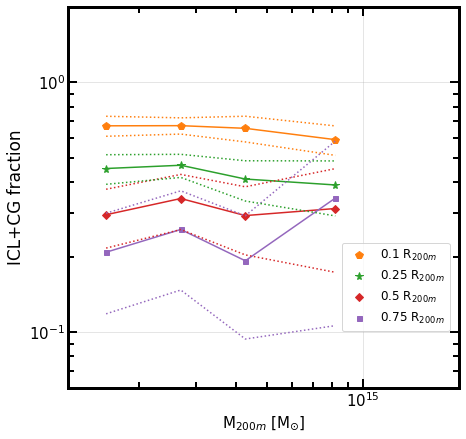

In [25]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
fig = plt.figure(figsize=(7,7))  
ax = plt.subplot(1,1,1)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)
colors = ['C2','C1','C3','C4']
lines = ['-',':','-.','--']
symbols = ['>', '<', 'D', '^', 'o',]


frac = []

M200m = []
ulimit = []
llimit = []


r_0_1 = []
r_0_25 = []
r_0_5 = []
r_0_75 = []
r_0_1_u = []
r_0_25_u = []
r_0_5_u = []
r_0_75_u = []
r_0_1_l = []
r_0_25_l = []
r_0_5_l = []
r_0_75_l = []

for i in range(4):
    

    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up1 = mea1+std1
    #low1 = mea1-std1
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up0 = mea0+std0
    #low0 = mea0-std0

    interp_mean0 = np.interp(r_red1, r_red0, mea0)
    interp_sigma0 = np.interp(r_red1, r_red0, std0)
    
    
    # clusters: m200 and r200
    lambdamean = [24.061209, 35.77201, 50.39139, 81.282715]
    lambda_= lambdamean[i]
    m200m = rm_mrr(np.array(lambda_))  
    rhoc = criticaldens(0.275)        
    rhoc_prop = rhoc  #* (cosmo.h**2)
    rhom = cosmo.Om0 * rhoc_prop * (1 + 0.275)**3
    r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) ) 
    r200m = r200m.value

    
    M200m.append(m200m)
    
    
    import uncertainties as unc  
    import uncertainties.unumpy as unumpy  
    import numpy as np 
    #import nemmen  

    # Defines x and y  
    x=mea1  
    y=interp_mean0 

    # Defines the error arrays, values follow a normal distribution  
    # (method random_normal defined in http://astropython.blogspot.com/2012/04/how-to-generate-array-of-random-numbers.html)  
    errx=std1
    erry=interp_sigma0

    # Defines special arrays holding the values *and* errors  
    x=unumpy.uarray(( x, errx ))  
    y=unumpy.uarray(( y, erry ))  
    
    z=x[1:]/y[1:]
    mean = unumpy.nominal_values(z)
    
    # Print the propagated error errz  
    std=unumpy.std_devs(z)
    
    up = mean+std
    low = mean-std

    r_0_1_ = np.interp(0.1*r200m, r_red1[1:],mean)
    r_0_25_ = np.interp(0.25*r200m, r_red1[1:],mean)
    r_0_5_ = np.interp(0.5*r200m, r_red1[1:],mean)
    r_0_75_ = np.interp(0.75*r200m, r_red1[1:],mean)

    r_0_1.append(r_0_1_) 
    r_0_25.append(r_0_25_) 
    r_0_5.append(r_0_5_) 
    r_0_75.append(r_0_75_) 
    
    r_0_1_up = np.interp(0.1*r200m, r_red1[1:],up)
    r_0_25_up = np.interp(0.25*r200m, r_red1[1:],up)
    r_0_5_up = np.interp(0.5*r200m, r_red1[1:],up)
    r_0_75_up = np.interp(0.75*r200m, r_red1[1:],up)

    r_0_1_u.append(r_0_1_up) 
    r_0_25_u.append(r_0_25_up) 
    r_0_5_u.append(r_0_5_up) 
    r_0_75_u.append(r_0_75_up) 
    
    r_0_1_low = np.interp(0.1*r200m, r_red1[1:],low)
    r_0_25_low = np.interp(0.25*r200m, r_red1[1:],low)
    r_0_5_low = np.interp(0.5*r200m, r_red1[1:],low)
    r_0_75_low = np.interp(0.75*r200m, r_red1[1:],low)

    r_0_1_l.append(r_0_1_low) 
    r_0_25_l.append(r_0_25_low) 
    r_0_5_l.append(r_0_5_low) 
    r_0_75_l.append(r_0_75_low) 

    
    
    #plt.plot(r_red1[1:], mean, lines[i], lw=1.5,alpha=0.6,color=colors[i],label=('%.2f'%(frac)).split('.')[-1]+'%'+' : '+str_ngals[i])
    #plt.fill_between(r_red1[1:], up, low, color=colors[i], alpha=0.15, label='')  
    
#plt.errorbar(M200m, frac, yerr=[ulimit,llimit], fmt='o', color='blue', markersize='6', ecolor='blue',capsize=2, elinewidth=1.)

col = ['C1','C2','C3','C4','C5','C6','black']
lab = ['0.1 R$_{200m}$','0.25 R$_{200m}$','0.5 R$_{200m}$', '0.75 R$_{200m}$' ]
fmts = ['p', '*', 'D', 's', 'x', 'o', '+']
mkse = ['8', '8', '6', '5', '6', '5', '6']

#plt.errorbar(M200m, r50, yerr=[r50_u,r50_l], fmt='p', color=col[0], markersize='6', ecolor=col[0],capsize=2, elinewidth=1., label=lab[0])
#plt.errorbar(M200m, r150, yerr=[r150_u,r150_l], fmt='*', color=col[1], markersize='6', ecolor=col[1],capsize=2, elinewidth=1., label=lab[1])
#plt.errorbar(M200m, r300, yerr=[r300_u,r300_l], fmt='D', color=col[2], markersize='6', ecolor=col[2],capsize=2, elinewidth=1., label=lab[2])
#plt.errorbar(M200m, r500, yerr=[r500_u,r500_l], fmt='s', color=col[3], markersize='6', ecolor=col[3],capsize=2, elinewidth=1., label=lab[3])
#plt.errorbar(M200m, r700, yerr=[r700_u,r700_l], fmt='x', color=col[4], markersize='6', ecolor=col[4],capsize=2, elinewidth=1., label=lab[4])
#plt.errorbar(M200m, r1000, yerr=[r1000_u,r1000_l], fmt='o', color=col[5], markersize='6', ecolor=col[5],capsize=2, elinewidth=1., label=lab[5])      

r_0_1_ = []
r_0_25_ = []
r_0_5_ = []
r_0_75_ = []

radius_ = [r_0_1, r_0_25, r_0_5, r_0_75]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], '-', color=col[jj])
    
radius_ = [r_0_1, r_0_25, r_0_5, r_0_75]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], fmts[jj], color=col[jj], markersize=mkse[jj], label=lab[jj])
    
radius_ = [r_0_1_u, r_0_25_u, r_0_5_u, r_0_75_u]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], ':', color=col[jj])
    
radius_ = [r_0_1_l, r_0_25_l, r_0_5_l, r_0_75_l]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], ':', color=col[jj])


#plt.yscale('symlog')
plt.xlim(1.2e14, 2e15)
plt.ylim(0.06, 2.)
plt.tick_params(direction='in',which='major', length=9, width=2, labelsize=0.3,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=6, width=2, labelsize=0.3,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(3.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)

#plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
#           numpoints=1,scatterpoints=1)
    


      


plt.xlabel('M$_{200m}$ [M$_{\odot}$]', fontsize=15) 
plt.ylabel('ICL+CG fraction', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(bbox_to_anchor=(0.7, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
           numpoints=1,scatterpoints=1)
plt.savefig(save_dir_rdmp+'paper_figures/'+'icl_frac_mass_r200.png', format='png', dpi=300)
plt.show()
##############################################################################

In [26]:
for i in range(4):

    
    # clusters: m200 and r200
    lambdamean = [24.061209, 35.77201, 50.39139, 81.282715]
    lambda_= lambdamean[i]
    m200m = rm_mrr(np.array(lambda_))  
    rhoc = criticaldens(0.275)        
    rhoc_prop = rhoc  #* (cosmo.h**2)
    rhom = cosmo.Om0 * rhoc_prop * (1 + 0.275)**3
    r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) ).value
    print(0.1*r200m )
    print(0.25*r200m )
    print(0.5*r200m )
    print(0.75*r200m )
    print(' ')

87.61444300973852
219.03610752434628
438.07221504869256
657.1083225730388
 
104.81460699317381
262.0365174829345
524.073034965869
786.1095524488036
 
122.37290894717871
305.9322723679468
611.8645447358936
917.7968171038403
 
151.89357576752758
379.7339394188189
759.4678788376378
1139.2018182564568
 


/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mpl

438.07221504869256 kpc / solMass(1/3)
524.073034965869 kpc / solMass(1/3)
611.8645447358936 kpc / solMass(1/3)
759.4678788376378 kpc / solMass(1/3)


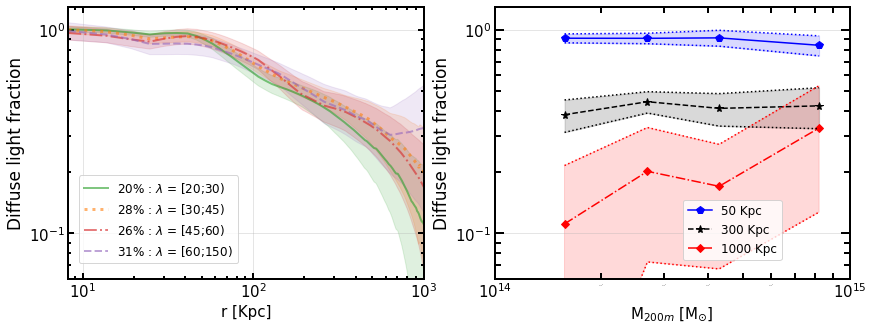

In [61]:

fig = plt.figure(figsize=(14,5))  
ax1 = plt.subplot(1,2,1)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)
colors = ['C2','C1','C3','C4']
lines = ['-',':','-.','--']
lws = [2, 3, 2, 2,]

for i in range(4):
    

    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up1 = mea1+std1
    #low1 = mea1-std1
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up0 = mea0+std0
    #low0 = mea0-std0

    interp_mean0 = np.interp(r_red1, r_red0, mea0)
    interp_sigma0 = np.interp(r_red1, r_red0, std0)
    
    
    
    import uncertainties as unc  
    import uncertainties.unumpy as unumpy  
    import numpy as np 
    #import nemmen  

    # Defines x and y  
    x=mea1  
    y=interp_mean0 

    # Defines the error arrays, values follow a normal distribution  
    # (method random_normal defined in http://astropython.blogspot.com/2012/04/how-to-generate-array-of-random-numbers.html)  
    errx=std1
    erry=interp_sigma0

    # Defines special arrays holding the values *and* errors  
    x=unumpy.uarray(( x, errx ))  
    y=unumpy.uarray(( y, erry ))  
    
    z=x[1:]/y[1:]
    mean = unumpy.nominal_values(z)
    
    # Print the propagated error errz  
    std=unumpy.std_devs(z)
    
    up = mean+std
    low = mean-std


    index = list(r_red1).index(702.50238)
    frac = (mean)[index]
    
    
    plt.plot(r_red1[1:], mean, lines[i], lw=lws[i],alpha=0.6,color=colors[i],label=('%.2f'%(frac)).split('.')[-1]+'%'+' : '+str_ngals[i])
    plt.fill_between(r_red1[1:], up, low, color=colors[i], alpha=0.15, label='')  
    

    
    plt.xticks(fontsize = 0)
    #plt.yscale('symlog')
    plt.xlim(-100, 1000.)
    #plt.ylim(-0.1, 1.3)
    plt.ylim(0.06, 1.3)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
                   bottom='on', top='on', left='on', right ='on')

    [ax1.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]


    plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1)
    


      


plt.xlabel('r [Kpc]', fontsize=15) 
plt.ylabel('Diffuse light fraction', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)





from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

ax2 = plt.subplot(1,2,2)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.4)
colors = ['C2','C1','C3','C4']
lines = ['-',':','-.','--']
symbols = ['>', '<', 'D', '^', 'o',]



frac = []

M200m = []
ulimit = []
llimit = []


r50 = []
r150 = []
r300 = []
r500 = []
r700 = []
r1000 = []
r50_u = []
r150_u = []
r300_u = []
r500_u = []
r700_u = []
r1000_u = []
r50_l = []
r150_l = []
r300_l = []
r500_l = []
r700_l = []
r1000_l = []

r_1_2 = []
r_1_2_u = []
r_1_2_l = []

for i in range(4):
    

    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    str_ngals = ['$\lambda$ = [20;30)',
                 '$\lambda$ = [30;45)',
                 '$\lambda$ = [45;60)',
                 '$\lambda$ = [60;150)']
    #dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'int_moments.txt')
    r_red1, mea1, std1 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up1 = mea1+std1
    #low1 = mea1-std1
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    #up0 = mea0+std0
    #low0 = mea0-std0

    interp_mean0 = np.interp(r_red1, r_red0, mea0)
    interp_sigma0 = np.interp(r_red1, r_red0, std0)
    
    
    # clusters: m200 and r200
    lambdamean = [24.061209, 35.77201, 50.39139, 81.282715]
    lambda_= lambdamean[i]
    m200m = rm_mrr(np.array(lambda_))  
    rhoc = criticaldens(0.275)        
    rhoc_prop = rhoc  #* (cosmo.h**2)
    rhom = cosmo.Om0 * rhoc_prop * (1 + 0.275)**3
    r200m = np.cbrt( (3.*m200m) / (2000.*np.pi*rhom) )  
    print(r200m/2.)
    r200m = r200m.value
    M200m.append(m200m)
    
    
    import uncertainties as unc  
    import uncertainties.unumpy as unumpy  
    import numpy as np 
    #import nemmen  

    # Defines x and y  
    x=mea1  
    y=interp_mean0 

    # Defines the error arrays, values follow a normal distribution  
    # (method random_normal defined in http://astropython.blogspot.com/2012/04/how-to-generate-array-of-random-numbers.html)  
    errx=std1
    erry=interp_sigma0

    # Defines special arrays holding the values *and* errors  
    x=unumpy.uarray(( x, errx ))  
    y=unumpy.uarray(( y, erry ))  
    
    z=x[1:]/y[1:]
    mean = unumpy.nominal_values(z)
    
    # Print the propagated error errz  
    std=unumpy.std_devs(z)
    
    up = mean+std
    low = mean-std


    index = list(r_red1[1:]).index(702.50238)
    frac.append(mean[index])

    
    ulimit.append(up[index])
    llimit.append(low[index])
    
    
    r50_ = np.interp(50, r_red1[1:],mean)
    r150_ = np.interp(150, r_red1[1:],mean)
    r300_ = np.interp(300, r_red1[1:],mean)
    r500_ = np.interp(500, r_red1[1:],mean)
    r700_ = np.interp(700, r_red1[1:],mean)
    r1000_ = np.interp(1000, r_red1[1:],mean)
    r_1_2_ = np.interp(r200m/2., r_red1[1:],mean)
    
    r50.append(r50_)
    r150.append(r150_)
    r300.append(r300_)
    r500.append(r500_)
    r700.append(r700_)
    r1000.append(r1000_)
    r_1_2.append(r_1_2_)    
    
    r50_up = np.interp(50, r_red1[1:],up)
    r150_up = np.interp(150, r_red1[1:],up)
    r300_up = np.interp(300, r_red1[1:],up)
    r500_up = np.interp(500, r_red1[1:],up)
    r700_up = np.interp(700, r_red1[1:],up)
    r1000_up = np.interp(1000, r_red1[1:],up)
    r_1_2_up = np.interp(r200m/2., r_red1[1:],up)
    
    r50_u.append(r50_up)
    r150_u.append(r150_up)
    r300_u.append(r300_up)
    r500_u.append(r500_up)
    r700_u.append(r700_up)
    r1000_u.append(r1000_up)
    r_1_2_u.append(r_1_2_up)
    
    
    
    r50_low = np.interp(50, r_red1[1:],low)
    r150_low = np.interp(150, r_red1[1:],low)
    r300_low = np.interp(300, r_red1[1:],low)
    r500_low = np.interp(500, r_red1[1:],low)
    r700_low = np.interp(700, r_red1[1:],low)
    r1000_low = np.interp(1000, r_red1[1:],low)
    r_1_2_low = np.interp(r200m/2., r_red1[1:], low)
    
    r50_l.append(r50_low)
    r150_l.append(r150_low)
    r300_l.append(r300_low)
    r500_l.append(r500_low)
    r700_l.append(r700_low)
    r1000_l.append(r1000_low)
    r_1_2_l.append(r_1_2_low)

    
    
    #plt.plot(r_red1[1:], mean, lines[i], lw=1.5,alpha=0.6,color=colors[i],label=('%.2f'%(frac)).split('.')[-1]+'%'+' : '+str_ngals[i])
    #plt.fill_between(r_red1[1:], up, low, color=colors[i], alpha=0.15, label='')  
    
#plt.errorbar(M200m, frac, yerr=[ulimit,llimit], fmt='o', color='blue', markersize='6', ecolor='blue',capsize=2, elinewidth=1.)

col = ['C1','C2','C3','C4','C5','C6','black']
col = ['blue','black', 'red']
lab = ['50 Kpc', '150 Kpc', '300 Kpc', '500 Kpc', '700 Kpc', '1000 Kpc', '0.5 R$_{200m}$' ]
lab = ['50 Kpc', '300 Kpc', '1000 Kpc', ]
fmts = ['p', '*', 'D', 's', 'x', 'o', '+']
mkse = ['8', '8', '6', '5', '6', '5', '6']
lines = ['-', '--', ';']
lines = ['solid','dashed','dashdot','dashdot']

#plt.errorbar(M200m, r50, yerr=[r50_u,r50_l], fmt='p', color=col[0], markersize='6', ecolor=col[0],capsize=2, elinewidth=1., label=lab[0])
#plt.errorbar(M200m, r150, yerr=[r150_u,r150_l], fmt='*', color=col[1], markersize='6', ecolor=col[1],capsize=2, elinewidth=1., label=lab[1])
#plt.errorbar(M200m, r300, yerr=[r300_u,r300_l], fmt='D', color=col[2], markersize='6', ecolor=col[2],capsize=2, elinewidth=1., label=lab[2])
#plt.errorbar(M200m, r500, yerr=[r500_u,r500_l], fmt='s', color=col[3], markersize='6', ecolor=col[3],capsize=2, elinewidth=1., label=lab[3])
#plt.errorbar(M200m, r700, yerr=[r700_u,r700_l], fmt='x', color=col[4], markersize='6', ecolor=col[4],capsize=2, elinewidth=1., label=lab[4])
#plt.errorbar(M200m, r1000, yerr=[r1000_u,r1000_l], fmt='o', color=col[5], markersize='6', ecolor=col[5],capsize=2, elinewidth=1., label=lab[5])      

radius_ = [r50, r150, r300, r500, r700, r1000, ]
radius_ = [r50, r300, r1000, ]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], marker= fmts[jj], linestyle=lines[jj], 
             markersize=mkse[jj], color=col[jj], label=lab[jj])

    
radius_ = [r50_u, r150_u, r300_u, r500_u, r700_u, r1000_u, ]
radius_ = [r50_u, r300_u, r1000_u, ]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], ':', color=col[jj])
    
radius_ = [r50_l, r300_l, r1000_l,]
for jj in range(len(radius_)):
    plt.plot(M200m, radius_[jj], ':', color=col[jj])
    
radius_u = [r50_u, r300_u, r1000_u,]
radius_l = [r50_l, r300_l, r1000_l,]
for jj in range(len(radius_u)):    
    plt.fill_between(M200m, radius_u[jj], radius_l[jj], color=col[jj], alpha=0.15, label='')  
    


#plt.yscale('symlog')
plt.xlim(1e14, 1e15)
plt.ylim(0.06, 1.3)
plt.tick_params(direction='in',which='major', length=9, width=2, labelsize=0,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=6, width=2, labelsize=0,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax2.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
#plt.subplots_adjust(wspace=0, hspace=0)

#plt.legend(bbox_to_anchor=(0.03, 0.38),  loc=2, fontsize=12,borderaxespad=0.,
#           numpoints=1,scatterpoints=1)
    


      


plt.xlabel('M$_{200m}$ [M$_{\odot}$]', fontsize=15) 
plt.ylabel('Diffuse light fraction', fontsize=17) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(bbox_to_anchor=(0.53, 0.29),  loc=2, fontsize=12,borderaxespad=0.,
           numpoints=1,scatterpoints=1)

plt.savefig(save_dir_rdmp+'paper_figures/'+'icl_frac.png', format='png', dpi=250)
plt.show()
##############################################################################